In [62]:
"""
Created on Sun Jul 27 20:28:42 2025

@author: BereketTarekegn
"""


'\nCreated on Sun Jul 27 20:28:42 2025\n\n@author: Bereket Tarekegn\n'

In [63]:
# Step 1: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [64]:
# Show plots in Spyder's plot pane
%matplotlib inline

In [65]:
# Step 2: upload file 
os.chdir(r"C:\Users\bezaa\OneDrive\Desktop\USD\Data Science Programming (ADS-500B-01\Group Assignment\My Project\Dataset 2 (House Sales)")

In [66]:
# Step 2.1: Load the dataset
df = pd.read_csv("house_sales.csv")

In [67]:
# Step 2.2: Show the first few rows
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [68]:
# Step 3: location-based features and price
location_df = df[['zipcode', 'lat', 'long', 'price']]

In [69]:
# See data types and if anything is missing
print(location_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  21613 non-null  int64  
 1   lat      21613 non-null  float64
 2   long     21613 non-null  float64
 3   price    21613 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 675.5 KB
None


In [70]:
# Basic statistics
print(location_df.describe())

            zipcode           lat          long         price
count  21613.000000  21613.000000  21613.000000  2.161300e+04
mean   98077.939805     47.560053   -122.213896  5.400881e+05
std       53.505026      0.138564      0.140828  3.671272e+05
min    98001.000000     47.155900   -122.519000  7.500000e+04
25%    98033.000000     47.471000   -122.328000  3.219500e+05
50%    98065.000000     47.571800   -122.230000  4.500000e+05
75%    98118.000000     47.678000   -122.125000  6.450000e+05
max    98199.000000     47.777600   -121.315000  7.700000e+06


In [71]:
# Count missing values
print(location_df.isnull().sum())

zipcode    0
lat        0
long       0
price      0
dtype: int64


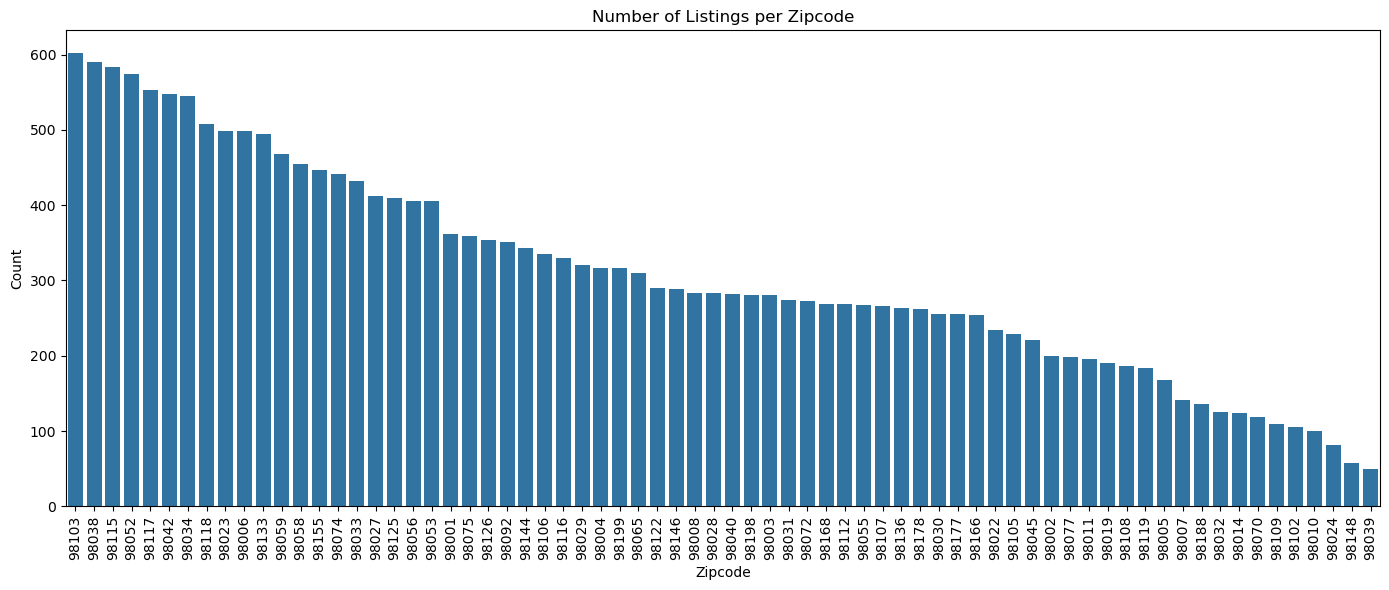

In [72]:
#4.1. Listings per Zipcode
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='zipcode', order=df['zipcode'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Listings per Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

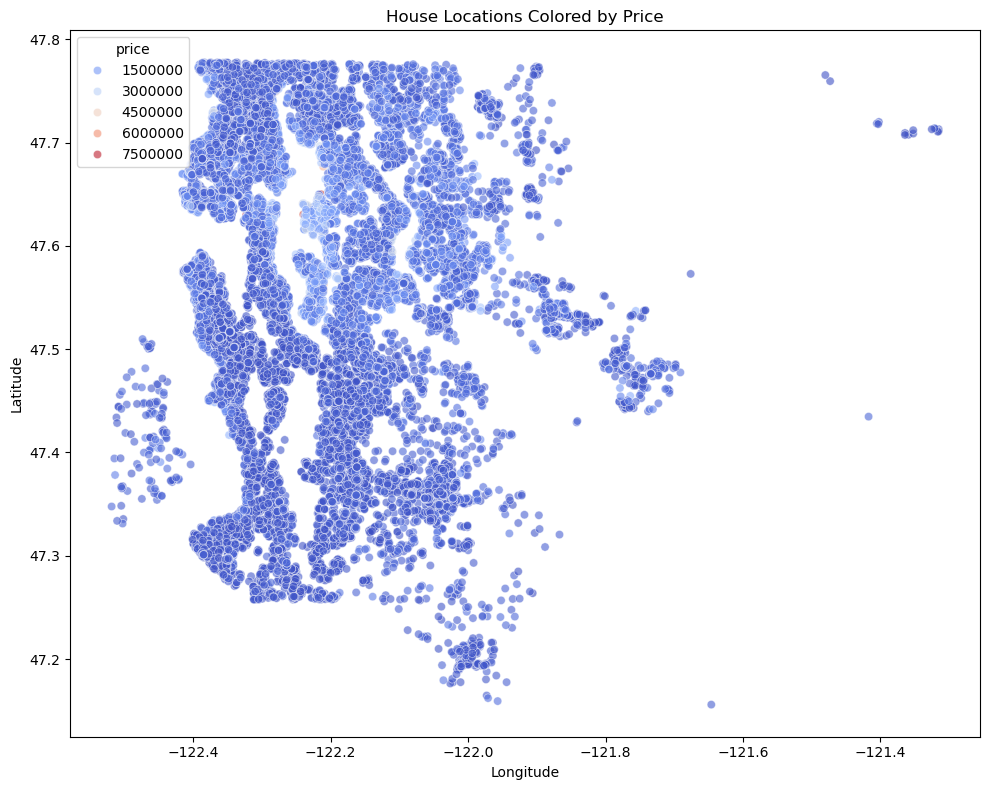

In [73]:
#4.2. Map of House Locations Colored by Price
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='coolwarm', alpha=0.6)
plt.title("House Locations Colored by Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [74]:
#4.3. Correlation Between Location and Price
# Correlation matrix for lat, long, and price
print(location_df.corr())

          zipcode       lat      long     price
zipcode  1.000000  0.267048 -0.564072 -0.053203
lat      0.267048  1.000000 -0.135512  0.307003
long    -0.564072 -0.135512  1.000000  0.021626
price   -0.053203  0.307003  0.021626  1.000000


In [75]:
#Step 5: Regression with Location Features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
# Use only lat and long to predict price
X = df[['lat', 'long']]
y = df['price']

In [77]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Check R² score (how well location explains price)
r2_score = model.score(X_test, y_test)
print(f"R² Score using lat/long to predict price: {r2_score:.4f}")

R² Score using lat/long to predict price: 0.0881
